In [1]:
#set parameters and read data
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

#use this function to show images
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

#model parameters
batch_size = 128
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#depends on backend, basically whether 1 (channel) is second or last argument in reshape
print(K.image_data_format())
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


channels_last
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


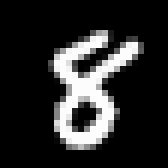

In [4]:
#check single images
n=1389
data_original = np.array(x_test[n,:,:,0])
data=np.kron(data_original, np.ones((6,6)))*255
imshow(data)

In [5]:
#define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu')) #changes dimension
model.add(Dropout(0.5)) #prevents overfitting
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
30336/60000 [==============>...............] - ETA: 39s - loss: 0.3993 - accuracy: 0.8738

KeyboardInterrupt: 

In [140]:
#save the network
from keras.models import load_model
model.save('my_model_keras.h5')  # creates a HDF5 file 'my_model.h5'

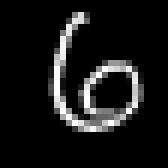

Predicted number: [6]
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_16 (Dropout)         (N

In [8]:
#classify for a single image
from keras.models import load_model
import numpy as np
model = load_model('my_model_keras.h5')
n=100
data_original = np.array(x_test[n,:,:,0])
data_magnified=np.kron(data_original, np.ones((6,6)))*255
imshow(data_magnified)
print("Predicted number: " + str(model.predict_classes(data_original.reshape((1,28,28,1)))))
model.summary()

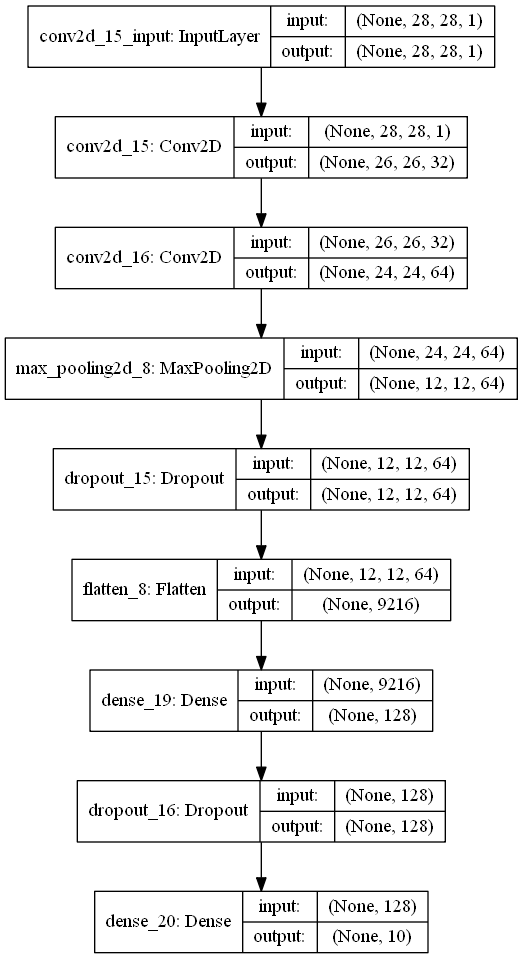

In [15]:
#visualize the network
from keras.utils.vis_utils import plot_model
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#print(os.environ["PATH"])
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)